In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize, LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rc('hatch', color='k', linewidth=4)
from utils.mo_degeneracy import get_mo_degeneracy
from utils.plotting_styles import plt_styles as _plt_styles
from copy import deepcopy

with open('data/N2_CS_noisy_energies.json', 'r') as infile:
    CS_noisy_energies = json.load(infile)
    CS_val,CS_std = zip(*CS_noisy_energies['CS-5q'])
    CS_val,CS_std = np.array(CS_val),np.array(CS_std)
    seps_CS = np.array(CS_noisy_energies['bond_lengths'])
    FCI_reduced = np.array(CS_noisy_energies['FCI'])
with open('data/N2_dissociation_results.json', 'r') as infile:
    import json
    N2_PEC_data = json.load(infile)

MO_energies      = np.array(N2_PEC_data['MO'])
seps_full        = np.array(N2_PEC_data['bond_lengths'])
CS_noiseless     = np.array(N2_PEC_data['energies']['CS-DD (5q)'])
NC               = np.array(N2_PEC_data['energies']['NC'])
HF               = np.array(N2_PEC_data['energies']['HF'])
MP2              = np.array(N2_PEC_data['energies']['MP2'])
CISD             = np.array(N2_PEC_data['energies']['CISD'])
CCSD             = np.array(N2_PEC_data['energies']['CCSD'])
CCSDT            = np.array(N2_PEC_data['energies']['CCSD(T)'])
FCI              = np.array(N2_PEC_data['energies']['FCI'])
CASCI42          = np.array(N2_PEC_data['energies']['CASCI(4,2)'])
CASCI54          = np.array(N2_PEC_data['energies']['CASCI(5,4)'])
CASCI66          = np.array(N2_PEC_data['energies']['CASCI(6,6)'])
CASCI78          = np.array(N2_PEC_data['energies']['CASCI(7,8)'])
CASSCF42         = np.array(N2_PEC_data['energies']['CASSCF(4,2)'])
CASSCF54         = np.array(N2_PEC_data['energies']['CASSCF(5,4)'])
CASSCF66         = np.array(N2_PEC_data['energies']['CASSCF(6,6)'])
CASSCF78         = np.array(N2_PEC_data['energies']['CASSCF(7,8)'])

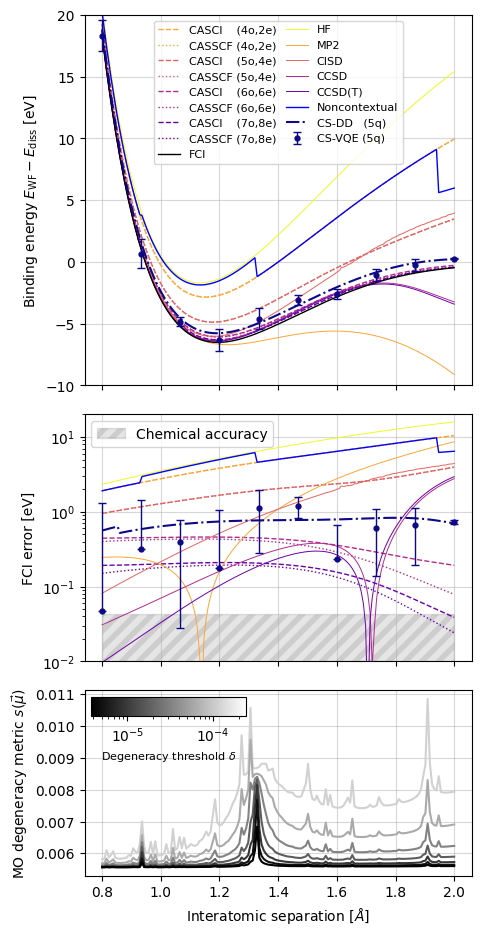

In [3]:
plt_styles = deepcopy(_plt_styles)
ev_unit = 27.2114
shift = -107.43802032518786
mask = np.append(True, np.diff(NC)<1)

scale=1.15
fig, axes = plt.subplots(3,1,figsize=(4*scale,8*scale),gridspec_kw={'height_ratios':(3,2,1.5)}, sharex=True)
fig.tight_layout()

axes[0].plot(seps_full, (CASCI42-shift)*ev_unit, **plt_styles['CASCI(4,2)'])
axes[0].plot(seps_full, (CASSCF42-shift)*ev_unit, **plt_styles['CASSCF(4,2)'])
axes[0].plot(seps_full, (CASCI54-shift)*ev_unit, **plt_styles['CASCI(5,4)'])
axes[0].plot(seps_full, (CASSCF54-shift)*ev_unit, **plt_styles['CASSCF(5,4)'])
axes[0].plot(seps_full, (CASCI66-shift)*ev_unit, **plt_styles['CASCI(6,6)'])
axes[0].plot(seps_full, (CASSCF66-shift)*ev_unit, **plt_styles['CASSCF(6,6)'])
axes[0].plot(seps_full, (CASCI78-shift)*ev_unit, **plt_styles['CASCI(7,8)'])
axes[0].plot(seps_full, (CASSCF78-shift)*ev_unit, **plt_styles['CASSCF(7,8)'])
axes[0].plot(seps_full, (FCI-shift)*ev_unit,  **plt_styles['FCI'])
axes[0].plot(seps_full, (HF-shift)*ev_unit,    **plt_styles['HF'])
axes[0].plot(seps_full, (MP2-shift)*ev_unit,   **plt_styles['MP2'])
axes[0].plot(seps_full, (CISD-shift)*ev_unit,  **plt_styles['CISD'])
axes[0].plot(seps_full, (CCSD-shift)*ev_unit,  **plt_styles['CCSD'])
axes[0].plot(seps_full, (CCSDT-shift)*ev_unit,  **plt_styles['CCSD(T)'])
axes[0].plot(seps_full[mask], (NC[mask]-shift)*ev_unit, **plt_styles['NC'])
axes[0].plot(seps_full, (CS_noiseless-shift)*ev_unit, color=plt_styles['CS']['color'], zorder=1000, label='CS-DD   (5q)', ls='-.')
axes[1].plot(seps_full, (CS_noiseless-FCI)*ev_unit, color=plt_styles['CS']['color'], zorder=1000, ls='-.')
eb = axes[0].errorbar(
    seps_CS, (CS_val-shift)*ev_unit, yerr=CS_std*ev_unit, 
     **plt_styles['CS']
)
# eb[-1][0].set_linestyle('-')
for s in plt_styles.values():s.pop('label')
axes[1].plot(seps_full, abs(CASCI42-FCI)*ev_unit,  **plt_styles['CASCI(4,2)'])
axes[1].plot(seps_full, abs(CASSCF42-FCI)*ev_unit, **plt_styles['CASSCF(4,2)'])
axes[1].plot(seps_full, abs(CASCI54-FCI)*ev_unit, **plt_styles['CASCI(5,4)'])
axes[1].plot(seps_full, abs(CASSCF54-FCI)*ev_unit, **plt_styles['CASSCF(5,4)'])
axes[1].plot(seps_full, abs(CASCI66-FCI)*ev_unit, **plt_styles['CASCI(6,6)'])
axes[1].plot(seps_full, abs(CASSCF66-FCI)*ev_unit, **plt_styles['CASSCF(6,6)'])
axes[1].plot(seps_full, abs(CASCI78-FCI)*ev_unit, **plt_styles['CASCI(7,8)'])
axes[1].plot(seps_full, abs(CASSCF78-FCI)*ev_unit, **plt_styles['CASSCF(7,8)'])
axes[1].plot(seps_full, abs(HF-FCI)*ev_unit,   **plt_styles['HF'])
axes[1].plot(seps_full, abs(MP2-FCI)*ev_unit,  **plt_styles['MP2'])
axes[1].plot(seps_full, abs(CISD-FCI)*ev_unit, **plt_styles['CISD'])
axes[1].plot(seps_full, abs(CCSD-FCI)*ev_unit, **plt_styles['CCSD'])
axes[1].plot(seps_full, abs(CCSDT-FCI)*ev_unit, **plt_styles['CCSD(T)'])
axes[1].fill_between(seps_full, 0, 0.0016*ev_unit,
    color='black', alpha=0.1, label='Chemical accuracy',hatch=r"//", 
)
axes[1].plot(seps_full[mask], abs(NC[mask]-FCI[mask])*ev_unit,   **plt_styles['NC'])
devs = np.tile(CS_std*ev_unit,reps=[2,1])
devs[0,(CS_val-FCI_reduced - CS_std)<0]=0
eb = axes[1].errorbar(
    seps_CS, abs(CS_val-FCI_reduced)*ev_unit, yerr=devs,
    **plt_styles['CS']
)
# eb[-1][0].set_linestyle(':')
axes[1].set_yscale('log')

minr = 12
maxr = 18
deltas = 1/2**np.arange(minr,maxr+1)
_deltas = np.log10(deltas)
normed = ((_deltas - _deltas.min())/max(_deltas - _deltas.min()) - 0.1)/1.1
for d,n in zip(deltas,normed):
    c = plt.cm.grey(n)
    cumulative = get_mo_degeneracy(MO_energies, d=d)
    axes[2].plot(seps_full, cumulative, alpha=1, ls='-', color=c)
# plt.yscale('log')

axins1 = inset_axes(axes[2], width='40%', height='10%', loc='upper left')
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=LogNorm(deltas.min(), deltas.max()))
cbar = fig.colorbar(sm, cax=axins1, orientation='horizontal')
# cbar.ax.set_xticklabels(['25', '75'])
axins1.xaxis.set_ticks_position('bottom')
cbar.set_label('Degeneracy threshold $\delta$', fontsize=8)

axes[2].set_ylabel('MO degeneracy metric $s(\\vec{\\mu})$')
axes[0].set_ylim([-10,20])
axes[1].set_ylim([0.01,20])
axes[0].grid(alpha=0.5)
axes[1].grid(alpha=0.5)
axes[2].grid(alpha=0.5)

axes[0].set_ylabel('Binding energy $E_{\\mathrm{WF}}-E_{\\mathrm{diss}}$ [eV]')
axes[1].set_ylabel('FCI error [eV]')
axes[2].set_xlabel('Interatomic separation [$\AA$]')
axes[0].legend(loc='upper center', ncol=2, fontsize=8, columnspacing=0.8)#, bbox_to_anchor=(0.5,1.25))
axes[1].legend(loc='upper left')

fig.savefig(f'plots/N2_full_QPU_PEC.png', dpi=300, bbox_inches='tight', transparent=True)